## Project Detail
- Data wrangling, which consists of:
    - Gathering data
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing our wrangled data
- Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import Counter
from scipy import stats
import pandas as pd
import numpy as np
import requests
import json
import time
import os
import re
import tweepy

## Gather Data

### Twitter Archive

In [2]:
# Read a csv file as a Pandas DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Image Predictions

In [4]:
# Download image_predictions.tsv file from Udacity server
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [5]:
with open ('image_predictions.tsv' ,'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')    

In [6]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


 ### Tweets

In [ ]:
# Twitter API for more data (save to local file)
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [ ]:
# Store data on tweet_json.txt
with open('tweet_json.txt', 'w') as outfile: 
    for tweet_id in df_twitter_archive['twitter_ids']:
        try:
            tweet = api.get_status(tweet_id)
            # Convert to JSON and write
            json.dump(tweet._json, outfile)
            outfile.write("\n")
            
        except:  # could be the case the tweet was deleted
            print('ERROR: Error on tweet id {}'.format(tweet_id))
            e = os.sys.exc_info()[0]

In [8]:
# Keep only certain elements in dataframe
elements_to_keep = ['id', 'favorite_count', 'retweet_count']
data = []

with open('tweet_json.txt', 'r') as file: 
    # Read the line from JSON.txt and convert it into dataframe
    tweet_json = file.readline()
    
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        # Create a smaller dict
        data_row = dict((element, tweet_dict[element]) for element in elements_to_keep)
        data.append(data_row)
        
        # Read the next line
        tweet_json = file.readline()
            
df_tweet= pd.DataFrame.from_dict(data)

In [9]:
df_tweet.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [10]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assess Data

In [11]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# View dog names and counts.
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Toby          7
Bailey        7
Daisy         7
an            7
Buddy         7
Stanley       6
Milo          6
Oscar         6
Leo           6
Bella         6
Jax           6
Dave          6
Jack          6
Koda          6
Rusty         6
Scout         6
Phil          5
           ... 
Ralf          1
Sully         1
Obi           1
Molly         1
Fillup        1
Crawford      1
Stark         1
Dietrich      1
Kota          1
Marty         1
Norman        1
Roscoe        1
Grizzie       1
Izzy          1
Brat          1
Callie        1
Lucky         1
Doobert       1
Dobby         1
Cilantro      1
Lolo          1
Pinot         1
Bruno         1
Opie          1
Hero          1
Georgie       1
Jimbo         1
Hall          1
Lili          1
Zoe           1
Name: name, Length: 957,

In [14]:
# View numerator counts.
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
# View denominator counts.
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
df_tweet

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
5,20562,891087950875897856,3261
6,12041,890971913173991426,2158
7,56848,890729181411237888,16716
8,28226,890609185150312448,4429
9,32467,890240255349198849,7711


## Quality Issues
### twitter_archive
- Wrong data type: **timestamp** and **retweeted_status_timestamp** should be datetime instead of object.
- Wrong data type: **in_reply_to_status_id** ,**in_reply_to_user_id**, **retweeted_status_id**, and **retweeted_status_user_id** should be string instead of float64.
- Retweets: Some entries are retweets. We only want to keep the original.
- Name: In **name** column, many entries do not look like names.
- Remove columns which are not required for the analysis and store the dataframe to twitter_archive_master.csv

### image_predictions
- Inconsistent capitalization: Some of the first letter in p1/p2/p3 are capital.
- Missing values: 2075 entries instead of 2356

### df_tweet
- Rename **id** column to **tweet_id** to be consistent with **twitter_archive** and **image_predictions**
- Missing values: 2354 entries instead of 2356

## Tidiness Issues
- Join **image_predictions** and **df_tweet** to **twitter_archive**.
- **twitter_archive**: one variable in four columns (doggo, floofer, pupper, puppo).

## Clean Data

In [18]:
# Copy dataframes
df_clean_twitter_archive = twitter_archive.copy()
df_clean_image_predictions = image_predictions.copy()
df_clean_tweet = df_tweet.copy()

### Define

Rename **id** column to **tweet_id** to be consistent with **twitter_archive** and **image_predictions**

### Code

In [19]:
df_clean_tweet.rename(columns={'id' : 'tweet_id'}, inplace=True)

### Test

In [20]:
df_clean_tweet.columns

Index(['favorite_count', 'tweet_id', 'retweet_count'], dtype='object')

### Define

#### Retweets: Some entries are retweets. We only want to keep the original.

### Code

In [21]:
# Identify retweets
df_clean_twitter_archive[df_clean_twitter_archive['retweeted_status_id'].notnull() == True ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [22]:
# Drop retweets
df_clean_twitter_archive.drop(df_clean_twitter_archive[df_clean_twitter_archive['retweeted_status_id'].notnull() == True ].index, inplace=True)

### Test

In [23]:
# Check result
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Define

 
 #### Wrong data type: **timestamp** and **retweeted_status_timestamp** should be datetime instead of object.

### Code

In [24]:
# Change datetype to datetime64
df_clean_twitter_archive.timestamp = pd.to_datetime(df_clean_twitter_archive.timestamp)
df_clean_twitter_archive.retweeted_status_timestamp = pd.to_datetime(df_clean_twitter_archive.retweeted_status_timestamp)

### Test

In [25]:
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns]

### Define

#### Wrong data type: **in_reply_to_status_id** ,**in_reply_to_user_id**, **retweeted_status_id**, and **retweeted_status_user_id** should be string instead of float64.

### Code

In [26]:
# Change datatype to int64
df_clean_twitter_archive['tweet_id'] = df_clean_twitter_archive['tweet_id'].values.astype(np.str)
df_clean_image_predictions['tweet_id'] = df_clean_image_predictions['tweet_id'].values.astype(np.str)
df_clean_tweet['tweet_id'] = df_clean_tweet['tweet_id'].values.astype(np.str)
df_clean_twitter_archive['in_reply_to_status_id'] = df_clean_twitter_archive['in_reply_to_status_id'].values.astype(np.str)
df_clean_twitter_archive['in_reply_to_user_id'] = df_clean_twitter_archive['in_reply_to_user_id'].values.astype(np.str)
df_clean_twitter_archive['retweeted_status_id'] = df_clean_twitter_archive['retweeted_status_id'].values.astype(np.str)
df_clean_twitter_archive['retweeted_status_user_id'] = df_clean_twitter_archive['retweeted_status_user_id'].values.astype(np.str)

### Test

In [27]:
# Check results
df_clean_twitter_archive.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Define

#### Inconsistent capitalization: Some of the first letter in p1/p2/p3 are capital.

### Code

In [28]:
# Lower p1/p2/p3 
df_clean_image_predictions['p1'] = df_clean_image_predictions['p1'].str.lower()
df_clean_image_predictions['p2'] = df_clean_image_predictions['p2'].str.lower()
df_clean_image_predictions['p3'] = df_clean_image_predictions['p3'].str.lower()

### Test

In [29]:
# Check results
print(df_clean_image_predictions['p1'].str.isupper().value_counts(), df_clean_image_predictions['p2'].str.isupper().value_counts(), df_clean_image_predictions['p3'].str.isupper().value_counts())

False    2075
Name: p1, dtype: int64 False    2075
Name: p2, dtype: int64 False    2075
Name: p3, dtype: int64


### Define

We will merge **'doggo', 'floofer', 'pupper', 'puppo'** into one 'dog_stage' column.

### Code

In [30]:
# Create new column dog_stage to replace ['doggo', 'floofer', 'pupper', 'puppo'] later
df_clean_twitter_archive['dog_stage'] = 'None'

In [31]:
# Define a fuction to get dog stage values from ['doggo', 'floofer', 'pupper', 'puppo']
def dogstage(row):
    
    dog_stage = []   
    
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    # If there is no value above, we will mark it as 'None'.    
    if len(dog_stage) == 0: 
        row['dog_stage'] = 'None'    

    else: 
        # Update the row and give back the final row
        row['dog_stage'] = ','.join(dog_stage)
    
    return row

# Apply the function
df_clean_twitter_archive = df_clean_twitter_archive.apply(dogstage, axis=1)

# Drop unnecessary columns. 
df_clean_twitter_archive = df_clean_twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [32]:
# Check results
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     2175 non-null object
dtypes: datetime64[ns](2), int64(2), object(10)
memory usage: 254.9+ KB


In [33]:
# Check the values of 'dog_stage'
df_clean_twitter_archive.dog_stage.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

### Define

#### Name: In name column, many entries do not look like names.

### Code

In [34]:
# Replace strange values with None
df_clean_twitter_archive['name'].replace("an",'None', inplace=True)
df_clean_twitter_archive['name'].replace("a",'None', inplace=True)
df_clean_twitter_archive['name'].replace("by",'None', inplace=True)
df_clean_twitter_archive['name'].replace("actually",'None', inplace=True)
df_clean_twitter_archive['name'].replace("old",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("all",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("this",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("very",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("not",'None', inplace=True)
df_clean_twitter_archive['name'].replace("one",'None', inplace=True)
df_clean_twitter_archive['name'].replace("my",'None', inplace=True)
df_clean_twitter_archive['name'].replace("O",'None', inplace=True)
df_clean_twitter_archive['name'].replace("quite","None", inplace=True)
df_clean_twitter_archive['name'].replace("such","None", inplace=True)
df_clean_twitter_archive['name'].replace('the', 'None', inplace=True)
df_clean_twitter_archive['name'].replace("just",'None', inplace=True)
df_clean_twitter_archive['name'].replace("getting",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("infuriating",'None', inplace=True) 

### Test

In [35]:
df_clean_twitter_archive['name'].value_counts()

None        777
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Lola          8
Winston       8
Sadie         8
Daisy         7
Toby          7
Oscar         6
Bailey        6
Jax           6
Bo            6
Koda          6
Stanley       6
Bella         6
Milo          5
Dave          5
Chester       5
Leo           5
Louis         5
Bentley       5
Buddy         5
Scout         5
Rusty         5
Bear          4
Larry         4
           ... 
Laela         1
Kendall       1
Benny         1
Vince         1
Opie          1
Nollie        1
Bruno         1
Pinot         1
Happy         1
Tuck          1
Taz           1
Aja           1
Strider       1
Stark         1
Kota          1
Marty         1
Norman        1
Roscoe        1
Grizzie       1
Izzy          1
Brat          1
Balto         1
Callie        1
Lucky         1
Doobert       1
Dobby         1
Cilantro      1
Lolo          1
Lorelei       1
Zoe           1
Name: name, Length: 938,

### Define

#### Remove columns which are not required for the analysis and store the dataframe to twitter_archive_master.csv

### Code

In [36]:
df_clean_twitter_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1, inplace=True)
df_clean_image_predictions.drop(['jpg_url','img_num'], axis=1, inplace=True)

### Test

In [37]:
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id              2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: int64(2), object(3)
memory usage: 102.0+ KB


In [38]:
df_clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id    2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(4)
memory usage: 119.6+ KB


In [39]:
df_clean_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Define

#### Join **image_predictions** and **df_tweet** to **twitter_archive**.

### Code

In [40]:
df_clean_twitter_archive = pd.merge(df_clean_twitter_archive, df_clean_image_predictions, on='tweet_id', how='inner')
df_clean_twitter_archive = pd.merge(df_clean_twitter_archive, df_clean_tweet, on='tweet_id', how='inner')

### Test

In [41]:
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id              1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: bool(3), float64(3), int64(4), object(6)
memory usage: 223.9+ KB


In [42]:
# Save the clean file to new csv: twitter_archive_master.csv
df_clean_twitter_archive.to_csv('twitter_archive_master.csv', index=False)

## Analyze data

In [43]:
# Read the clean csv file as new data frame.
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id              1994 non-null int64
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: bool(3), float64(3), int64(5), object(5)
memory usage: 208.4+ KB


#### What are the top 10 rated dog breeds?

In [44]:
# Extract breed and confidence from p1/p2/p3
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('unknown')
        conf.append(0)

df.apply(breed_conf, axis = 1)

df['breed'] = breed
df['confidence'] = conf

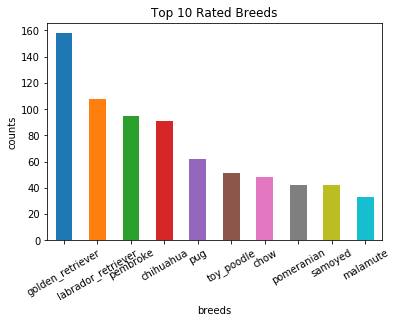

In [45]:
# Ignore 'unknown' and draw a bar char.
top_dog = df[df['breed'] != 'unknown']
plt.title('Top 10 Rated Breeds')
plt.ylabel('counts')
plt.xlabel('breeds')
top_dog['breed'].value_counts()[0:10].plot(kind='bar', rot=30);

#### What are the top 5 most common dog names?

In [46]:
Counter(df['name']).most_common(11)

[('None', 639),
 ('Charlie', 11),
 ('Oliver', 10),
 ('Cooper', 10),
 ('Lucy', 10),
 ('Penny', 9),
 ('Tucker', 9),
 ('Sadie', 8),
 ('Winston', 8),
 ('Lola', 7),
 ('Daisy', 7)]

Result: top 1 is **Charlie**, top 2 is **Oliver**, top 3 is **Cooper**, top 4 is **Lucy**, top 5 is **Penny** (None is ignored).

#### What are the correlation between favorite counts and rating for different dog stage?

In [47]:
# Define rating
df['rating'] = df['rating_numerator'] / df['rating_denominator']

In [48]:
df.groupby('dog_stage').rating.describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
None,1688.0,1.180085,4.419681,0.0,1.000,1.1,1.2,177.6
doggo,63.0,1.188889,0.147135,0.8,1.100,1.2,1.3,1.4
"doggo,floofer",1.0,1.100000,NaN,1.1,1.100,1.1,1.1,1.1
"doggo,pupper",9.0,1.100000,0.239792,0.5,1.100,1.2,1.2,1.3
"doggo,puppo",1.0,1.300000,NaN,1.3,1.300,1.3,1.3,1.3
floofer,7.0,1.200000,0.115470,1.0,1.150,1.2,1.3,1.3
pupper,203.0,1.071429,0.207463,0.3,1.000,1.1,1.2,2.7
puppo,22.0,1.200000,0.130931,0.9,1.125,1.2,1.3,1.4


In [49]:
df.groupby('dog_stage').favorite_count.describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
None,1688.0,8478.924763,11208.822562,81.0,1717.25,3912.5,11017.00,107956.0
doggo,63.0,19356.380952,22208.483825,2593.0,8268.00,12376.0,20502.50,131075.0
"doggo,floofer",1.0,17169.000000,NaN,17169.0,17169.00,17169.0,17169.00,17169.0
"doggo,pupper",9.0,12533.111111,12216.210904,4849.0,7039.00,8992.0,10342.00,44619.0
"doggo,puppo",1.0,47844.000000,NaN,47844.0,47844.00,47844.0,47844.00,47844.0
floofer,7.0,13206.000000,11258.315105,2262.0,5045.50,11302.0,17721.00,33345.0
pupper,203.0,7197.738916,10703.793028,693.0,2423.50,3226.0,7669.00,106827.0
puppo,22.0,21582.090909,28034.339585,3277.0,7043.50,13387.5,19691.25,132810.0


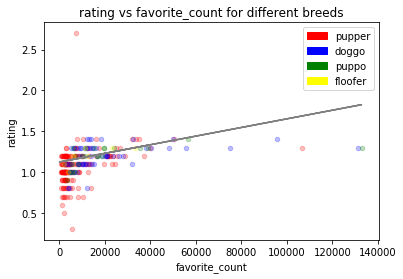

In [53]:
# Create linear line
y, x = df.rating, df.favorite_count
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope*x + intercept

# Create separate data frames for each of the dog stage (ignore the multiple stage data)
df_puppers = df[df['dog_stage'] == 'pupper']
df_puppo = df[df['dog_stage'] == 'puppo']
df_doggo = df[df['dog_stage'] == 'doggo']
df_floofer = df[df['dog_stage'] == 'floofer']
df_none = df[df['dog_stage'] == 'None']

bx = df_puppers.plot(kind = 'scatter', x='favorite_count', y='rating', color='Red', alpha=0.25)
df_doggo.plot(kind = 'scatter', x='favorite_count', y='rating', color='Blue', ax=bx, alpha=0.25)
df_puppo.plot(kind = 'scatter', x='favorite_count', y='rating', color='Green', ax=bx, alpha=0.25)
df_floofer.plot(kind = 'scatter', x='favorite_count', y='rating', color='Yellow', ax=bx, alpha=0.25)

# Legend
puppers = mpatches.Patch(label='pupper', color = 'Red')
doggo = mpatches.Patch(label='doggo', color = 'Blue')
puppo = mpatches.Patch(label='puppo', color = 'Green')
floofer = mpatches.Patch(label='floofer', color = 'Yellow')

plt.legend(handles=[puppers, doggo, puppo, floofer])
plt.title('rating vs favorite_count for different breeds')
plt.plot(x, line, color='grey');

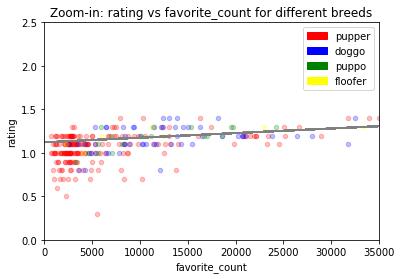

In [54]:
# Zoom in closter to data clusters.
xlim = (0, 35000)
ylim = (0, 2.5)

bx = df_puppers.plot(kind = 'scatter', x='favorite_count', y='rating', color='Red', alpha=0.25, ylim=ylim, xlim=xlim)
df_doggo.plot(kind = 'scatter', x='favorite_count', y='rating', color='Blue', ax=bx, alpha=0.25, ylim=ylim, xlim=xlim)
df_puppo.plot(kind = 'scatter', x='favorite_count', y='rating', color='Green', ax=bx, alpha=0.25, ylim=ylim, xlim=xlim)
df_floofer.plot(kind = 'scatter', x='favorite_count', y='rating', color='Yellow', ax=bx, alpha=0.25, ylim=ylim, xlim=xlim)

plt.legend(handles=[puppers, doggo, puppo, floofer])
plt.title('Zoom-in: rating vs favorite_count for different breeds')
plt.plot(x, line, color='grey');